In [2]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import os
import random
import warnings
warnings.filterwarnings('ignore')

In [3]:
warnings.filterwarnings('ignore')
# Set image_size and batch_size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Target Directory
directory = "flowers"

# Train Data
train_data = tf.keras.preprocessing.image_dataset_from_directory(
             directory,
             subset='training',
             validation_split=0.2,
             image_size=IMAGE_SIZE,
             batch_size=BATCH_SIZE,
             seed=42)

# Valid data
valid_data = tf.keras.preprocessing.image_dataset_from_directory(
            directory,
            subset='validation',
            validation_split=0.2,
            image_size=IMAGE_SIZE,
            batch_size=BATCH_SIZE,
             seed=42)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [4]:
class_names = train_data.class_names
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [5]:
label_encode = LabelEncoder()
class_names_label_encode = label_encode.fit_transform(class_names)
class_names_label_encode

array([0, 1, 2, 3, 4], dtype=int64)

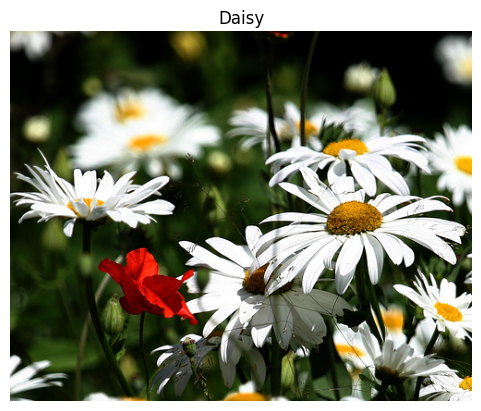

In [6]:
img = plt.imread("flowers/daisy/102841525_bd6628ae3c.jpg")
plt.imshow(img)
plt.title("Daisy")
plt.axis("off")
plt.show()

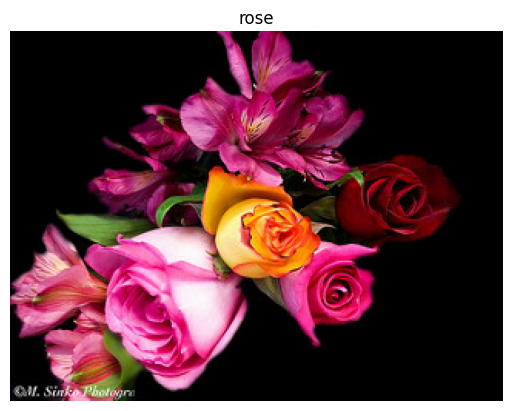

In [7]:
img = plt.imread("flowers/rose/11233672494_d8bf0a3dbf_n.jpg")
plt.imshow(img)
plt.title("rose")
plt.axis("off")
plt.show()

In [8]:
def preprocess_image(image, label, image_shape=224):
    
    img = tf.image.resize(image, [image_shape, image_shape])
    img = img/225.
    
    return tf.cast(img, tf.float32), label

In [9]:
preprocess_image(image=img, label='tulip')

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        ...,
 
        [[0.02548755, 0.0210431 

In [10]:
# map the preprocess_image to train_data
train_data = train_data.map(map_func=preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
# shuffle the data
train_data = train_data.shuffle(buffer_size=1000).prefetch(buffer_size=tf.data.AUTOTUNE)


# map the preprocess_image to valid_data
valid_data = valid_data.map(map_func=preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
# shuffle the data
valid_data = valid_data.shuffle(buffer_size=1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [11]:
train_data, valid_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [12]:
# Set random seed
tf.random.set_seed(42)

# model 1
model_1 = Sequential([
    Conv2D(filters=32, kernel_size=4, padding='same', activation='relu',input_shape=(224,224,3)),
    MaxPool2D(2,2),
    Conv2D(filters=64, kernel_size=4, padding='same', activation='relu'),
    MaxPool2D(2,2), 
    Conv2D(filters=64, kernel_size=4, padding='same', activation='relu'),
    MaxPool2D(2,2),
    Dropout(0.5),
    Flatten(),
    Dense(len(class_names_label_encode), activation='softmax')
])

# Compile
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])

# Fit
history_1 = model_1.fit(train_data,epochs=5,validation_data=valid_data)

Epoch 1/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 84s 677ms/step - accuracy: 0.3711 - loss: 1.4547 - val_accuracy: 0.5550 - val_loss: 1.0581
Epoch 2/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 77s 694ms/step - accuracy: 0.5832 - loss: 1.0920 - val_accuracy: 0.5689 - val_loss: 1.0977
Epoch 3/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 78s 705ms/step - accuracy: 0.6497 - loss: 0.9317 - val_accuracy: 0.6280 - val_loss: 0.9113
Epoch 4/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 75s 673ms/step - accuracy: 0.7293 - loss: 0.7443 - val_accuracy: 0.6257 - val_loss: 0.9646
Epoch 5/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 75s 677ms/step - accuracy: 0.7860 - loss: 0.5766 - val_accuracy: 0.6628 - val_loss: 0.9142


In [13]:
# model_1 summary
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │       250,885 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,052,657 (4.02 MB)

 Trainable params: 350,885 (1.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 701,772 (2.68 MB)

In [14]:
def plot_loss_curves(history):
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

  # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

  # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

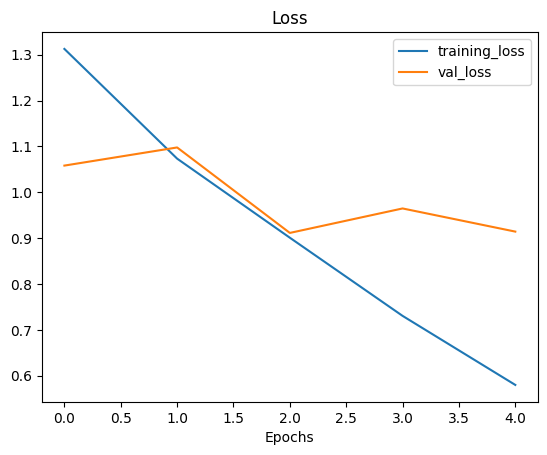

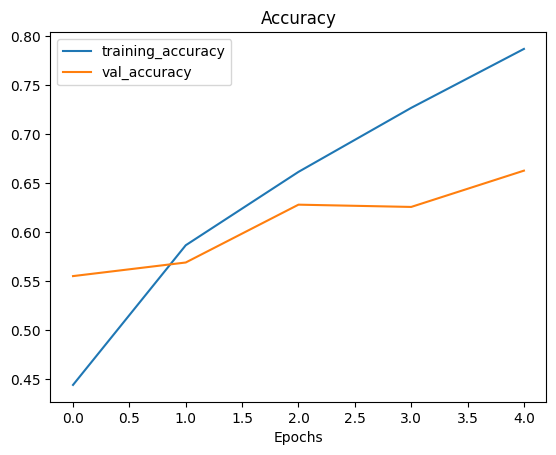

In [15]:
plot_loss_curves(history=history_1)

In [16]:
# Download Inception V3 model
base_model_inception = tf.keras.applications.inception_v3.InceptionV3(include_top=False)

# Freeze the layers
base_model_inception.trainable=False

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 48s 1us/step


AttributeError: module 'tensorflow.keras.layers' has no attribute 'experimental'

In [18]:
# Inputs
inputs = tf.keras.layers.Input(shape=(224,224,3), name='input_layer')

# Scaling the values
x = tf.keras.layers.Rescaling(1/255.)(inputs)

# Pass inputs to our base_model
x = base_model_inception(inputs,training=False)

# GlobalAveragePooling2D
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# outputs
outputs = tf.keras.layers.Dense(len(class_names_label_encode), activation='softmax')(x)

# Build model
model_4 = tf.keras.Model(inputs, outputs)

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])

In [19]:
model_4.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │        10,245 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,813,029 (83.21 MB)

 Trainable params: 10,245 (40.02 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [20]:
# Fit the model
history_4 = model_4.fit(train_data,epochs=5,validation_data=valid_data)

Epoch 1/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.6177 - loss: 0.9775 - val_accuracy: 0.8355 - val_loss: 0.4853
Epoch 2/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.8383 - loss: 0.4385 - val_accuracy: 0.8679 - val_loss: 0.4164
Epoch 3/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.8886 - loss: 0.3320 - val_accuracy: 0.8459 - val_loss: 0.4086
Epoch 4/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.9086 - loss: 0.2823 - val_accuracy: 0.8644 - val_loss: 0.3913
Epoch 5/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.9197 - loss: 0.2541 - val_accuracy: 0.8575 - val_loss: 0.3934


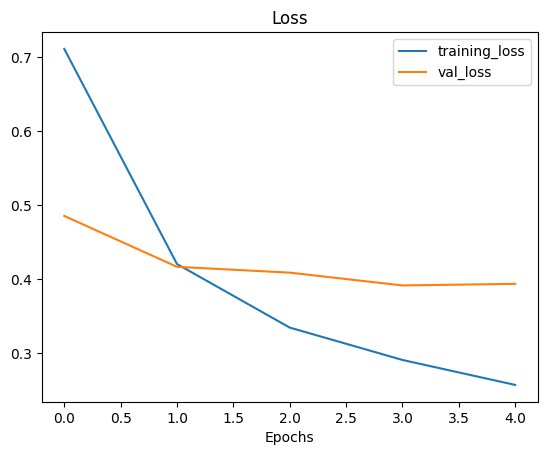

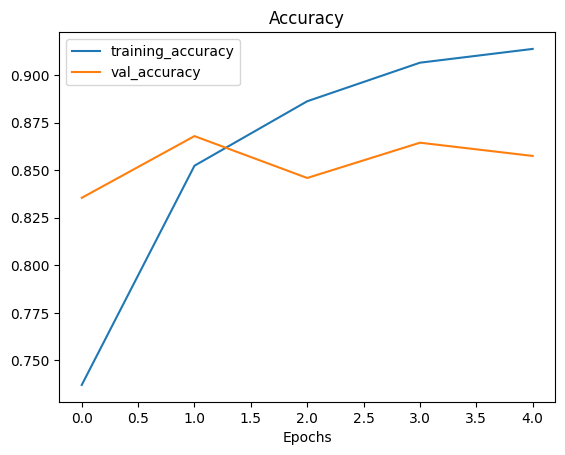

In [21]:
plot_loss_curves(history_4)